In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Amazon Sale Report.csv')
data.head()

C:\Users\kumar\AppData\Local\Temp\ipykernel_20524\2682170935.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
data.shape

(128975, 24)

In [5]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

## Remove Unrelevant Columns

In [6]:
data.drop(['index', 'ship-service-level', 'currency', 'ASIN', 'currency', 'ship-city', 'ship-state',
         'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by', 'Unnamed: 22'], axis=1, inplace=True)

In [7]:
print(f'The Features Variables are = {data.shape[1]}')

The Features Variables are = 13


In [8]:
df = data.copy()
df

,Order ID,Date,Status,Fulfilment,Sales Channel,Style,SKU,Category,Size,Courier Status,Qty,Amount,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,SET389,SET389-KR-NP-S,Set,S,NaN,0,647.62,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,J0341,J0341-DR-L,Western Dress,L,NaN,0,753.33,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,JNE3697,JNE3697-KR-XL,kurta,XL,Shipped,1,517.00,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,SET401,SET401-KR-NP-M,Set,M,Shipped,1,999.00,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,J0157,J0157-DR-XXL,Western Dress,XXL,Shipped,1,690.00,False
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,J0012,J0012-SKD-XS,Set,XS,Shipped,1,1199.00,False


In [9]:
df.isna().sum()

Order ID             0
Date                 0
Status               0
Fulfilment           0
Sales Channel        0
Style                0
SKU                  0
Category             0
Size                 0
Courier Status    6872
Qty                  0
Amount            7795
B2B                  0
dtype: int64

In [10]:
df['Courier Status'].unique()

array([nan, 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [11]:
df['Amount'].unique().sum()

nan

### Drop the Nan values

In [12]:
df.dropna(subset=['Courier Status', 'Amount'], inplace=True)

In [13]:
df.isnull().sum()

Order ID          0
Date              0
Status            0
Fulfilment        0
Sales Channel     0
Style             0
SKU               0
Category          0
Size              0
Courier Status    0
Qty               0
Amount            0
B2B               0
dtype: int64

In [14]:
df.duplicated().sum()

3

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

Order ID           object
Date               object
Status             object
Fulfilment         object
Sales Channel      object
Style              object
SKU                object
Category           object
Size               object
Courier Status     object
Qty                 int64
Amount            float64
B2B                  bool
dtype: object

In [18]:
df.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,Style,SKU,Category,Size,Courier Status
count,116041,116041,116041,116041,116041,116041,116041,116041,116041,116041
unique,108295,91,12,2,1,1371,7132,9,11,2
top,403-4984515-8861958,05-02-22,Shipped,Amazon,Amazon.in,JNE3797,JNE3797-KR-L,Set,M,Shipped
freq,12,1879,77593,83636,116041,3677,660,45088,20343,109484


In [19]:
df.describe()

,Qty,Amount
count,116041.000000,116041.000000
mean,1.003775,649.769228
std,0.072643,282.636211
min,1.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,606.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [20]:
df.describe(include='bool')

,B2B
count,116041
unique,2
top,False
freq,115216


## Exploratory Data Analysis(EDA)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Set'),
  Text(1, 0, 'kurta'),
  Text(2, 0, 'Western Dress'),
  Text(3, 0, 'Top'),
  Text(4, 0, 'Ethnic Dress'),
  Text(5, 0, 'Blouse'),
  Text(6, 0, 'Bottom'),
  Text(7, 0, 'Saree'),
  Text(8, 0, 'Dupatta')])

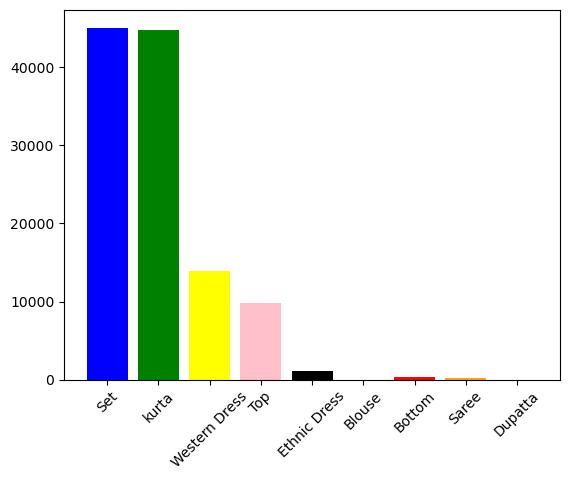

In [21]:
# count the category

counts = df['Category'].value_counts()
plt.bar(x=counts.index, height=counts.values, color=['blue', 'green', 'yellow', 'pink', 'black', 'white',
                                               'red', 'orange', 'violet'])
plt.xticks(rotation=45)

## Top 5 performing product categories in terms of quantity sold and revenue generated

In [22]:
top_categories = df.groupby('Category').agg(total_quantity =('Qty', 'sum'), total_revenue=('Amount', 'sum')).sort_values(by=[
    'total_quantity', 'total_revenue'], ascending=False)

Top_five = top_categories.head(5)
print(Top_five)

               total_quantity  total_revenue
Category                                    
Set                     45223     37660322.0
kurta                   44969     20451608.0
Western Dress           13939     10629096.0
Top                      9899      5203733.0
Ethnic Dress             1053       760711.0


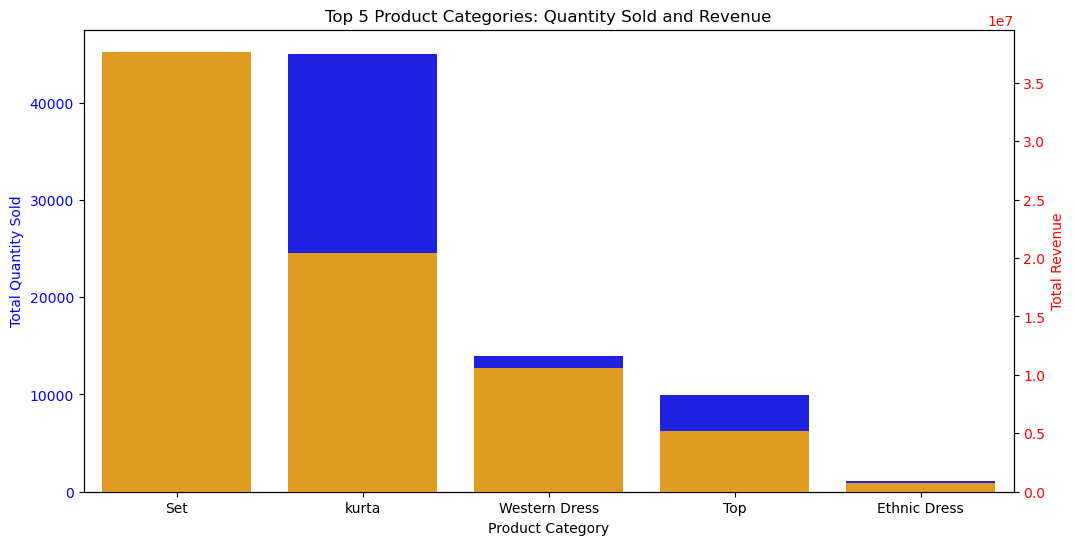

In [23]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for total quantity sold
sns.barplot(x=Top_five.index, y='total_quantity', data=Top_five, ax=ax1, color='b', label='Total Quantity Sold')
ax1.set_ylabel('Total Quantity Sold', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for total revenue
ax2 = ax1.twinx()
sns.barplot(x=Top_five.index, y='total_revenue', data=Top_five, ax=ax2, color='orange', label='Total Revenue')
ax2.set_ylabel('Total Revenue', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and labels
plt.title('Top 5 Product Categories: Quantity Sold and Revenue')
ax1.set_xlabel('Product Category')

# Show plot
plt.show()

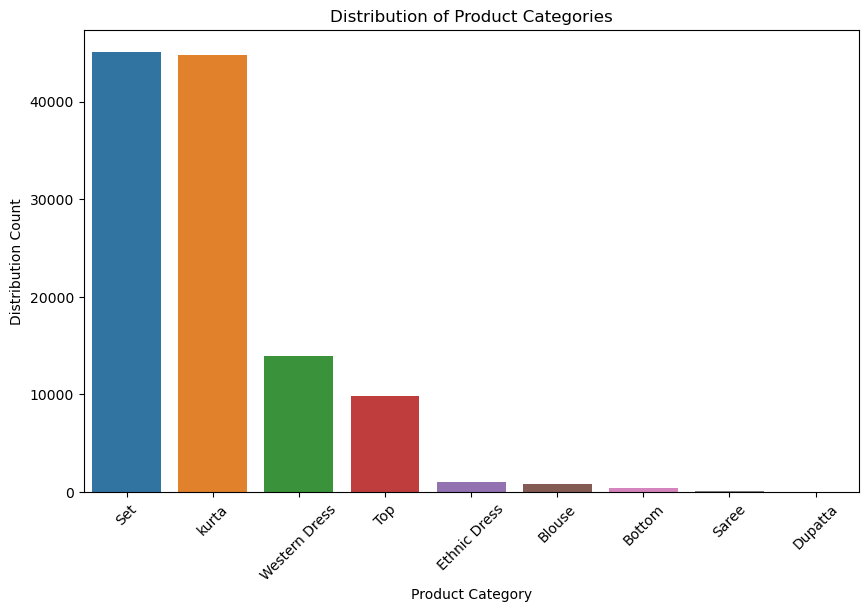

In [24]:
# Distribution of product catgeories

plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df, order=df['Category'].value_counts().index)


plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Distribution Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [25]:
product_size = df['Size']
product_size

1         3XL
2          XL
4         3XL
5          XL
6           L
         ... 
128970     XL
128971      M
128972    XXL
128973     XS
128974      S
Name: Size, Length: 116041, dtype: object

In [26]:
# Use ordinal Encoding change the datatype of Size

from sklearn.preprocessing import OrdinalEncoder

product_reshaped = product_size.values.reshape(-1,1)
Oe = OrdinalEncoder()
Encoded_data = Oe.fit_transform(product_reshaped)

df['Size'] = Encoded_data

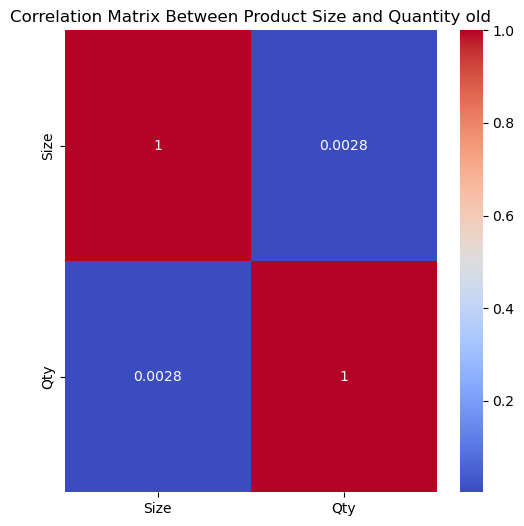

In [27]:
# Correlations between product size and quantity sold

correlations = df[['Size', 'Qty']]
correlations

df_corr = correlations.corr()
plt.figure(figsize=(6,6))
sns.heatmap(df_corr, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix Between Product Size and Quantity old')
plt.show()

C:\Users\kumar\AppData\Local\Temp\ipykernel_20524\2480518478.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


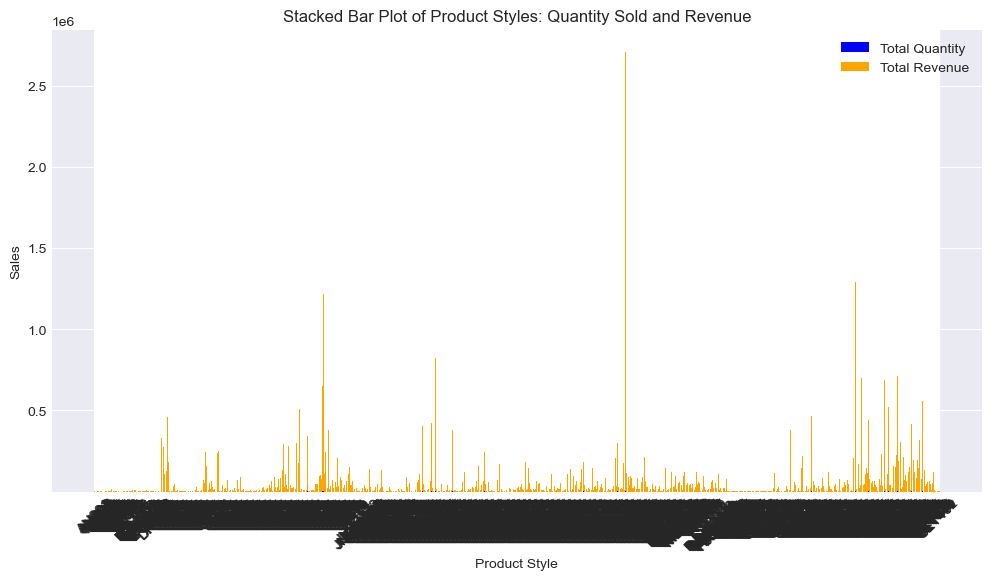

In [28]:
# Which styles of products generate the most sales in terms of quantity and amount

style_summary = df.groupby('Style').agg(total_quantity=('Qty', 'sum'), total_revenue=('Amount', 'sum')).reset_index()

style_summary


# Create a DataFrame for stacking
stacked_data = pd.DataFrame({
    'Style': style_summary['Style'],
    'Total Quantity': style_summary['total_quantity'],
    'Total Revenue': style_summary['total_revenue']
})

# Set the style for the plot
plt.style.use('seaborn-darkgrid')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the stacked bar plot
ax.bar(stacked_data['Style'], stacked_data['Total Quantity'], label='Total Quantity', color='blue')
ax.bar(stacked_data['Style'], stacked_data['Total Revenue'], bottom=stacked_data['Total Quantity'], label='Total Revenue', color='orange')

# Adding title and labels
ax.set_title('Stacked Bar Plot of Product Styles: Quantity Sold and Revenue')
ax.set_xlabel('Product Style')
ax.set_ylabel('Sales')
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [29]:
summaries = df.groupby('Style').agg(total_quantity=('Qty', 'sum'), total_revenue=('Amount', 'sum')).sort_values(by=[
                                                'total_quantity', 'total_revenue'], ascending=False)

summaries[:1]

,total_quantity,total_revenue
Style,,
JNE3797,3692,2707151.0


## Sales Trend Analysis

In [30]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df['Date']

df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['week'] = df['week'].astype('int64')
df['month'] = df['month'].astype('int64')
df['year'] = df['year'].astype('int64')

Grouping_data = df.groupby(['week', 'month', 'year']).agg(Total_Quantity = ('Qty', 'sum'), Total_Amount=(
'Amount', 'sum')).reset_index()
Grouping_data

,week,month,year,Total_Quantity,Total_Amount
0,13,3,2022,156,98261.0
1,13,4,2022,4271,2699460.0
2,14,4,2022,10223,6436852.0
3,15,4,2022,10473,6565581.0
4,16,4,2022,10910,6761386.0
5,17,4,2022,8234,5118572.0
6,17,5,2022,1661,1052370.0
7,18,5,2022,10801,6929245.0
8,19,5,2022,7571,5042768.0
9,20,5,2022,7393,4976730.0


<Axes: xlabel='week', ylabel='Total_Quantity'>

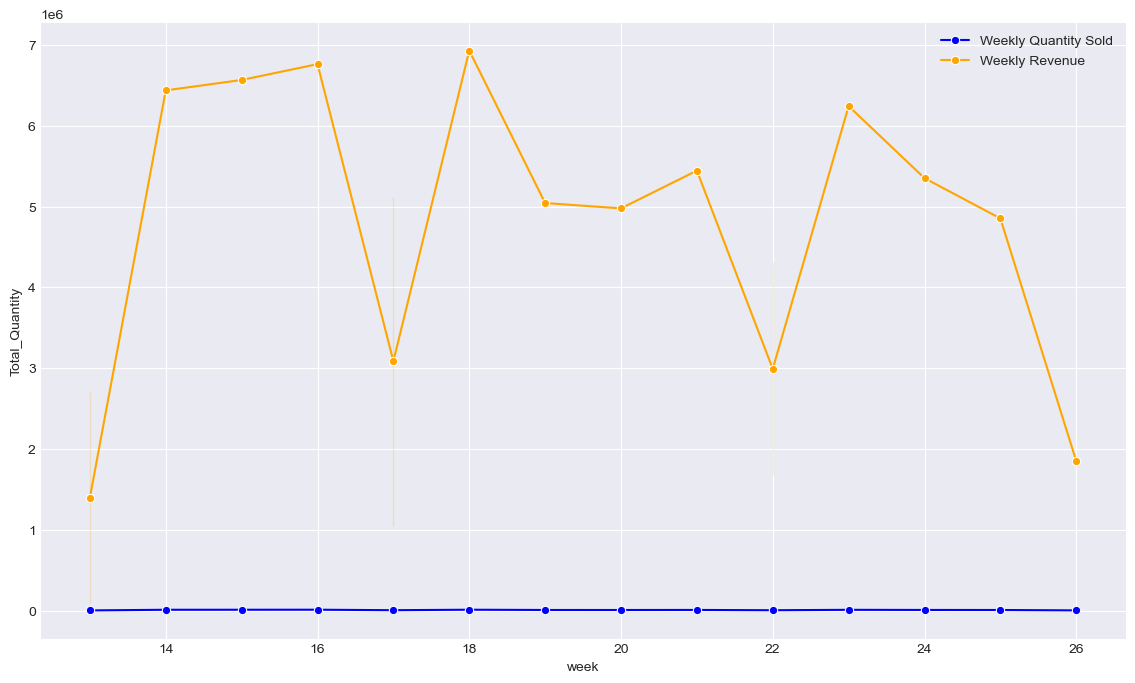

In [31]:
plt.figure(figsize=(14, 8))

# Weekly Sales Trend
sns.lineplot(x='week', y='Total_Quantity', data=Grouping_data, marker='o', label='Weekly Quantity Sold', color='blue')
sns.lineplot(x='week', y='Total_Amount', data=Grouping_data, marker='o', label='Weekly Revenue', color='orange')

<Axes: xlabel='month', ylabel='Total_Quantity'>

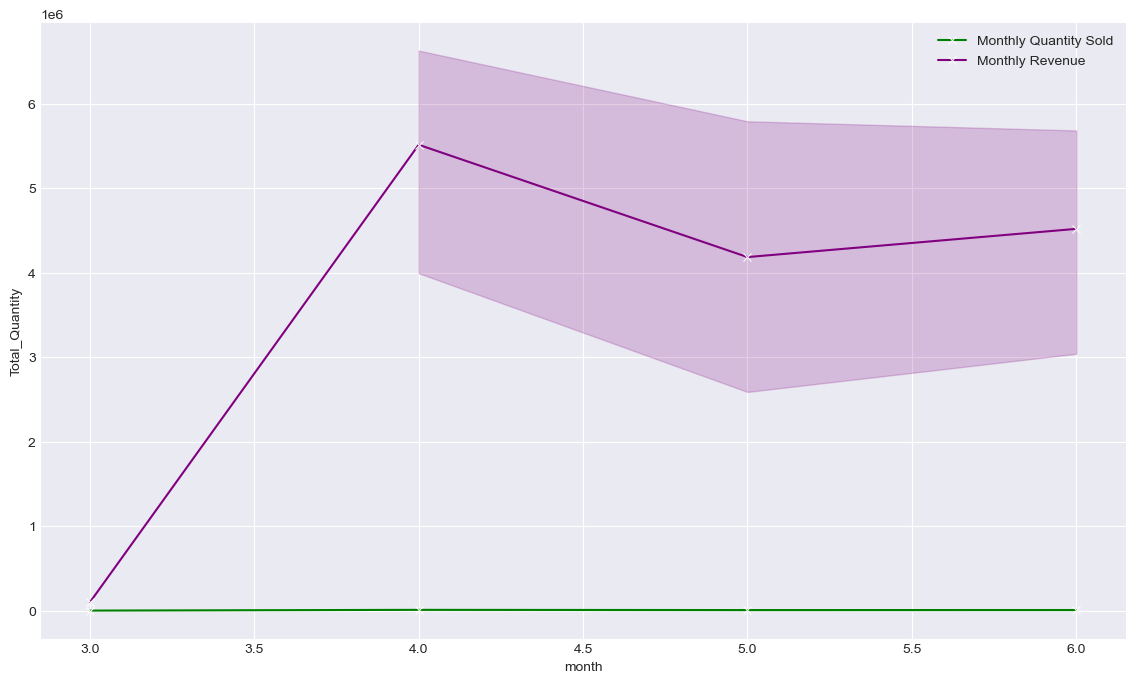

In [32]:
plt.figure(figsize=(14, 8))

# Monthly Sales Trend
sns.lineplot(x='month', y='Total_Quantity', data=Grouping_data, marker='x', label='Monthly Quantity Sold', color='green')
sns.lineplot(x='month', y='Total_Amount', data=Grouping_data, marker='x', label='Monthly Revenue', color='purple')

<Axes: xlabel='year', ylabel='Total_Quantity'>

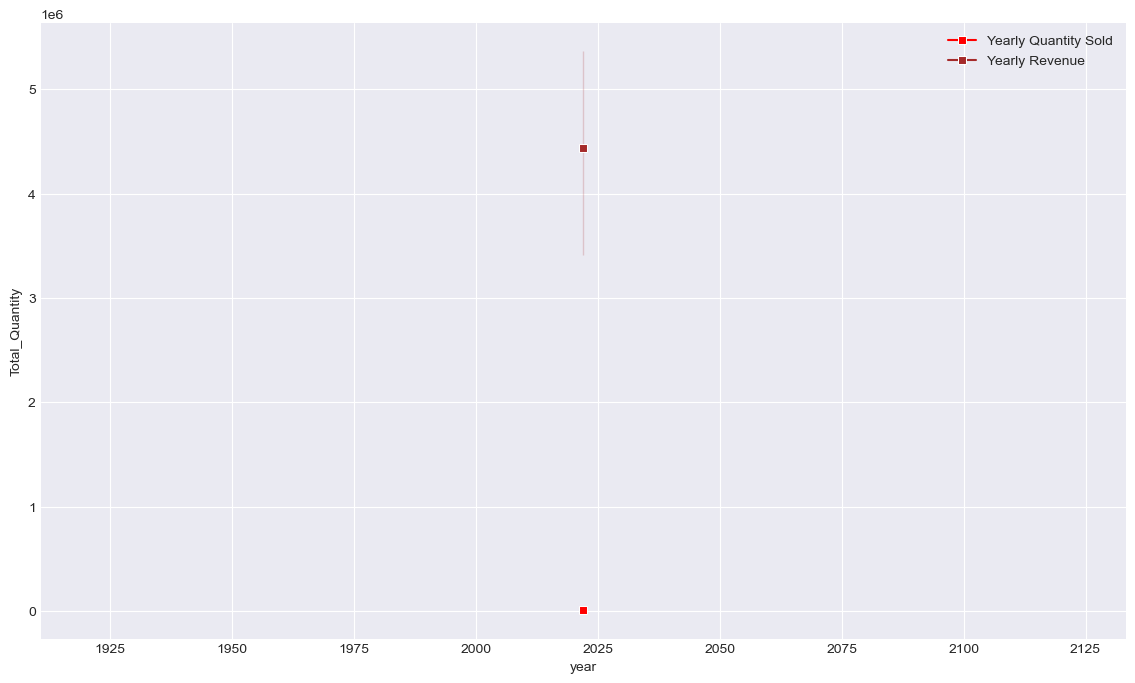

In [33]:
plt.figure(figsize=(14, 8))

# Yearly Sales Trend
sns.lineplot(x='year', y='Total_Quantity', data=Grouping_data, marker='s', label='Yearly Quantity Sold', color='red')
sns.lineplot(x='year', y='Total_Amount', data=Grouping_data, marker='s', label='Yearly Revenue', color='brown')

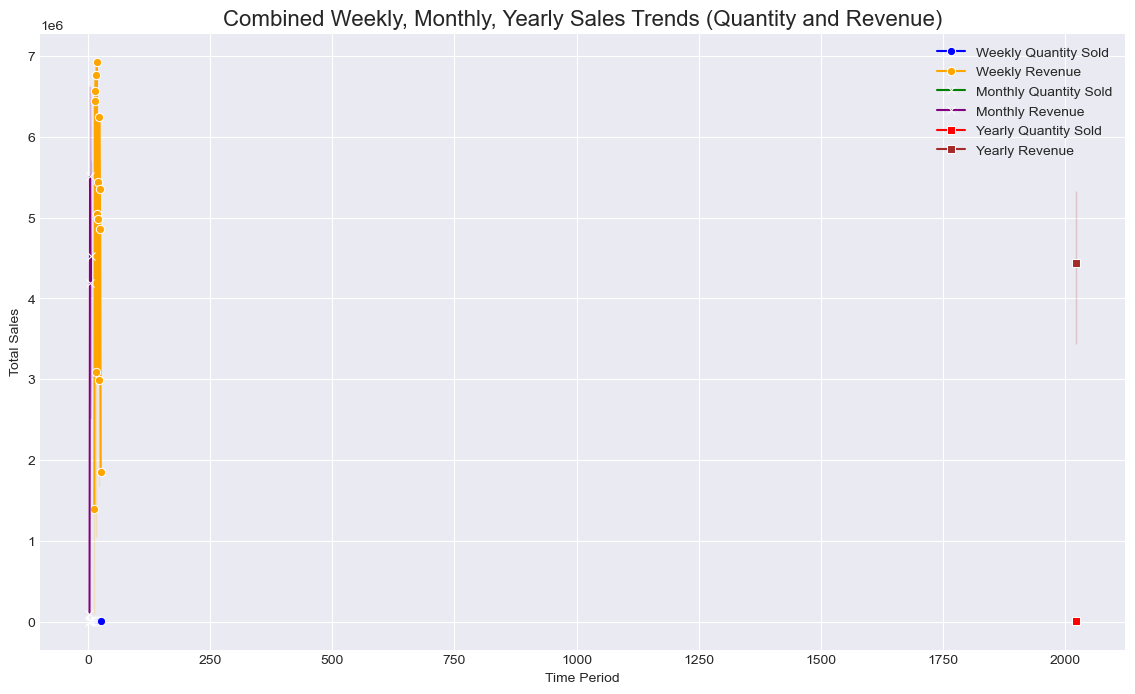

In [34]:
# Plot for Combined Weekly, Monthly, and Yearly Sales Trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='week', y='Total_Quantity', data=Grouping_data, marker='o', label='Weekly Quantity Sold', color='blue')
sns.lineplot(x='week', y='Total_Amount', data=Grouping_data, marker='o', label='Weekly Revenue', color='orange')

sns.lineplot(x='month', y='Total_Quantity', data=Grouping_data, marker='x', label='Monthly Quantity Sold', color='green')
sns.lineplot(x='month', y='Total_Amount', data=Grouping_data, marker='x', label='Monthly Revenue', color='purple')

sns.lineplot(x='year', y='Total_Quantity', data=Grouping_data, marker='s', label='Yearly Quantity Sold', color='red')
sns.lineplot(x='year', y='Total_Amount', data=Grouping_data, marker='s', label='Yearly Revenue', color='brown')

plt.title('Combined Weekly, Monthly, Yearly Sales Trends (Quantity and Revenue)', fontsize=16)
plt.xlabel('Time Period')
plt.ylabel('Total Sales')

plt.legend()
plt.show()


### Seasonal or monthly patterns in sales amounts

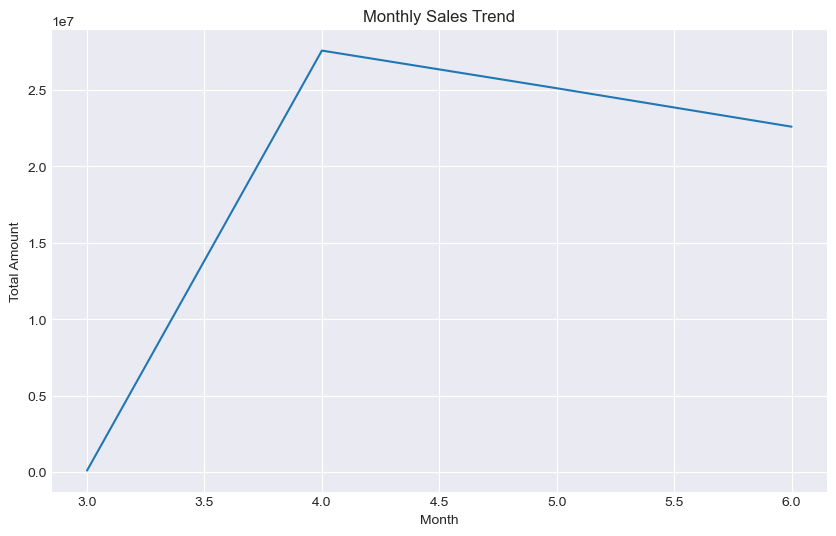

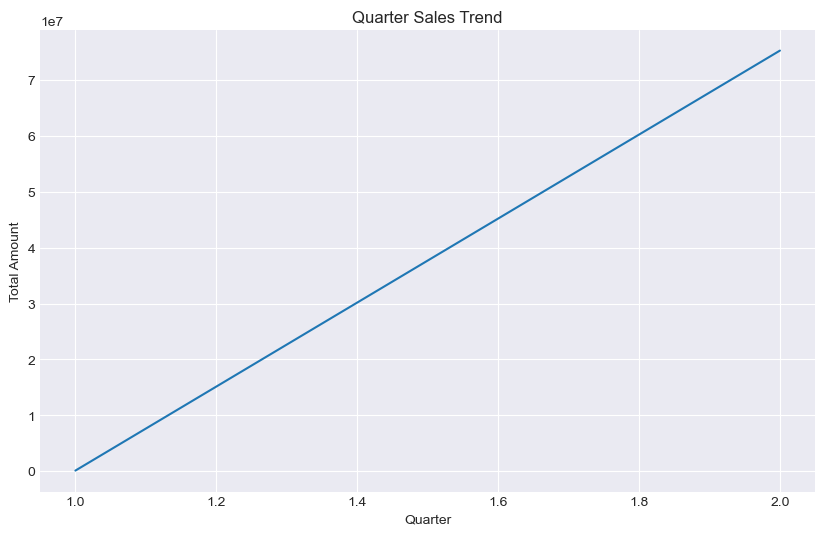

In [35]:
monthly_sales = df.groupby(df['Date'].dt.month).agg(Total_Amount= ('Amount', 'sum')).reset_index()
quarterly_sales = df.groupby(df['Date'].dt.quarter).agg(Total_Amount = ('Amount', 'sum')).reset_index()

# Monthly Sales
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Total_Amount', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.show()

# Quarterly Sales
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Total_Amount', data=quarterly_sales)
plt.title('Quarter Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Amount')
plt.show()

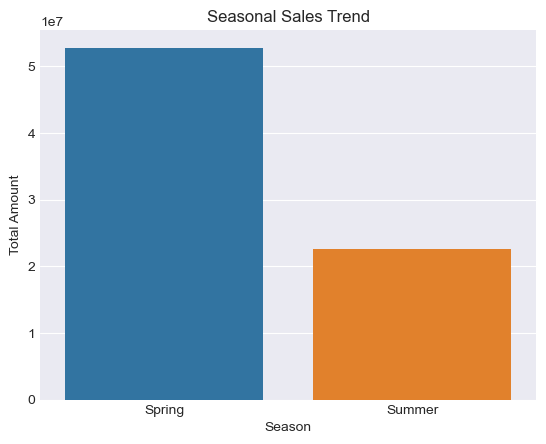

In [36]:
# Seasonal Sales 

def Seasonal(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
    
df['Season'] = df['Date'].dt.month.apply(Seasonal)
seasonal_sales = df.groupby('Season').agg(Total_amount = ('Amount', 'sum')).reset_index()

# Seasonal Trend
sns.barplot(x='Season', y='Total_amount', data=seasonal_sales)
plt.title('Seasonal Sales Trend')
plt.xlabel('Season')
plt.ylabel('Total Amount')
plt.show()

###  Get daily total quantity and amount
### Detect the peak sales period

In [37]:

daily_sales = df.groupby('Date').agg(
    total_quantity=('Qty', 'sum'),
    total_amount=('Amount', 'sum')
).reset_index()

average_quantity_per_day = daily_sales['total_quantity'].mean()
average_amount_per_day = daily_sales['total_amount'].mean()

print(f'Average Quantity Sold per Day: {average_quantity_per_day}')
print(f'Average Sales Amount per Day: {average_amount_per_day}')

Average Quantity Sold per Day: 1279.989010989011
Average Sales Amount per Day: 828570.010989011


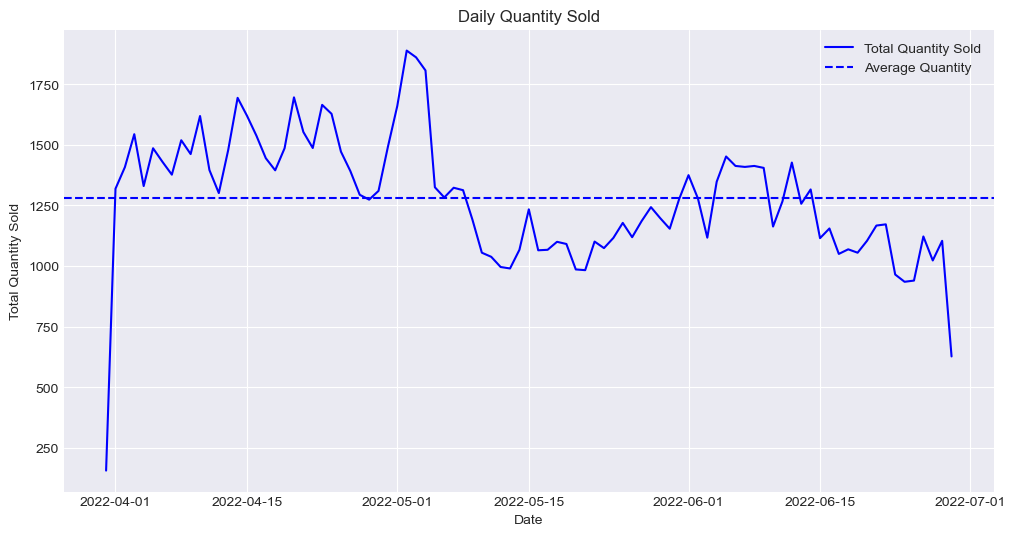

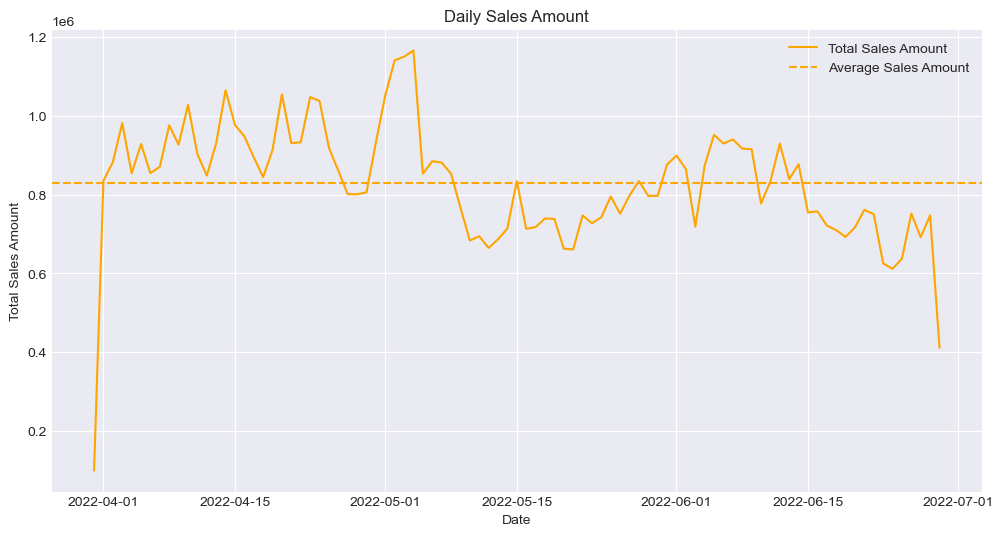

In [38]:
# Plot total quantity sold per day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='total_quantity', data=daily_sales, color='b', label='Total Quantity Sold')
plt.axhline(y=average_quantity_per_day, color='blue', linestyle='--', label='Average Quantity')
plt.title('Daily Quantity Sold')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

# Plot total sales amount per day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='total_amount', data=daily_sales, color='orange', label='Total Sales Amount')
plt.axhline(y=average_amount_per_day, color='orange', linestyle='--', label='Average Sales Amount')
plt.title('Daily Sales Amount')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.show()


In [39]:
# Peak Sales Period

peaked_sales = daily_sales[daily_sales['total_amount'] > average_amount_per_day]
print(peaked_sales.sort_values(by='total_amount', ascending=False).head())

         Date  total_quantity  total_amount
34 2022-05-04            1807     1165893.0
33 2022-05-03            1861     1150425.0
32 2022-05-02            1889     1141051.0
14 2022-04-14            1694     1065048.0
20 2022-04-20            1696     1054618.0


### Customer Demographics

In [40]:
# What was the Precentage of Business sales and non-business sale


Business_B2_count = df['B2B'].value_counts(normalize=True)*100
print(Business_B2_count)

b2_revenue = df.groupby('B2B')['Amount'].sum()
revenue_precentage = (b2_revenue/b2_revenue.sum())*100
print(revenue_precentage)

B2B
False    99.289044
True      0.710956
Name: proportion, dtype: float64
B2B
False    99.230861
True      0.769139
Name: Amount, dtype: float64


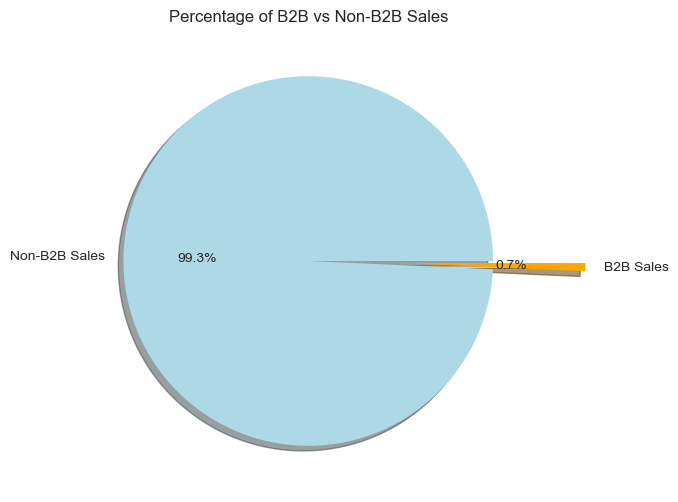

In [41]:
# Pie chart for sales percentage

plt.figure(figsize=(6,6))
my_explode = [0,0.5]
Business_B2_count.plot(kind='pie', autopct='%1.1f%%', labels=['Non-B2B Sales', 'B2B Sales'], colors=['lightblue', 'orange'],
                      shadow=True, explode=my_explode)
plt.title('Percentage of B2B vs Non-B2B Sales')
plt.ylabel('')
plt.show()


In [42]:
# How does the quantity of B2B vs. non-B2B sales compare across product categories?

Each_category = df.groupby(['Category', 'B2B']).agg(Total_quantity=('Qty', 'sum'), Total_sales=('Amount', 'sum')).reset_index()
Each_category

,Category,B2B,Total_quantity,Total_sales
0,Blouse,False,836,431608.0
1,Blouse,True,8,3143.0
2,Bottom,False,394,138917.0
3,Bottom,True,3,1309.0
4,Dupatta,False,3,915.0
5,Ethnic Dress,False,1039,748885.0
6,Ethnic Dress,True,14,11826.0
7,Saree,False,150,116858.0
8,Saree,True,2,1651.0
9,Set,False,44892,37366885.0


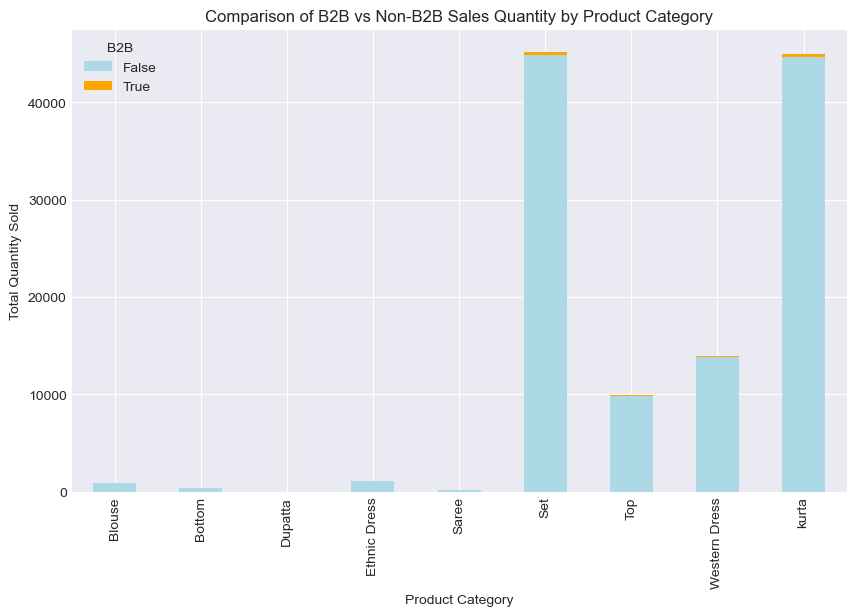

In [43]:
# Pivot the data to get B2B and Non-B2B values in separate columns
category_pivot = Each_category.pivot(index='Category', columns='B2B', values='Total_quantity').fillna(0)

category_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'orange'])
plt.title('Comparison of B2B vs Non-B2B Sales Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()


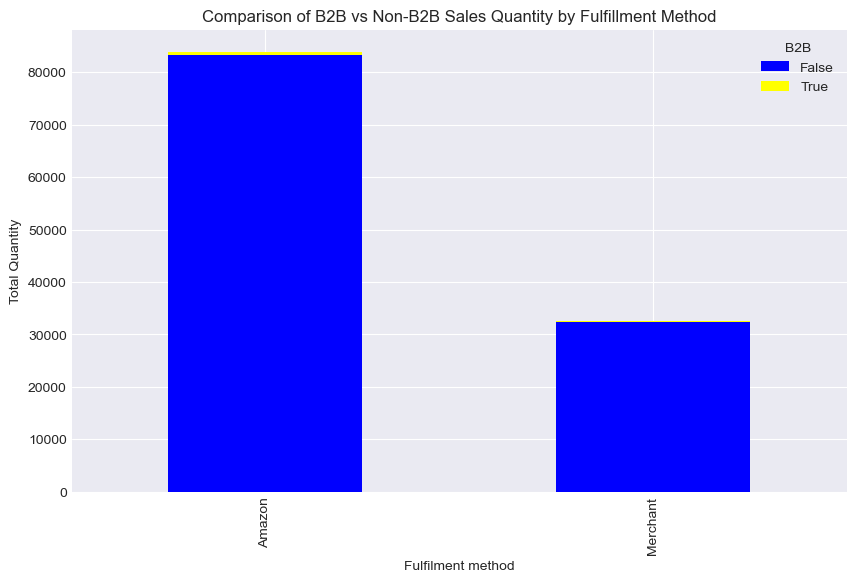

In [44]:
# Which fulfillment methods are most commonly used for B2B sales versus non-B2B sales?

counts_business = df.groupby(['Fulfilment', 'B2B']).agg(Total_quantity=('Qty', 'sum'),
                                                        Total_amount=('Amount', 'sum')).reset_index()
counts_business

Stacked_data = counts_business.pivot(index='Fulfilment', columns='B2B', values='Total_quantity').fillna(0)

Stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'yellow'])
plt.title('Comparison of B2B vs Non-B2B Sales Quantity by Fulfillment Method')
plt.xlabel('Fulfilment method')
plt.ylabel('Total Quantity')
plt.show()

### Fulfilment and Courier Status:

Fulfilment
Amazon      83636
Merchant    32405
Name: count, dtype: int64


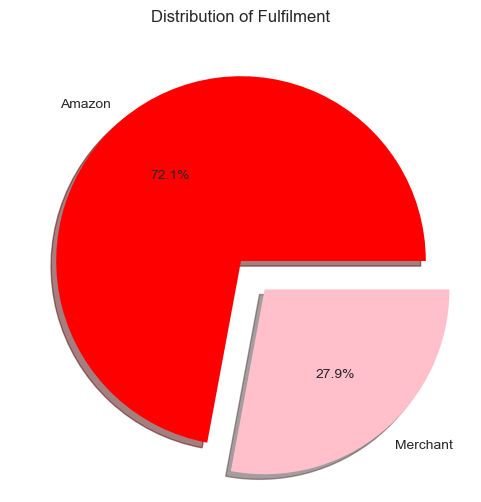

In [45]:
# The distribution of fulfillment methods used for sales.

Dist_fulfilment = df['Fulfilment'].value_counts()
print(Dist_fulfilment)

pie_explode = [0,0.2]
plt.figure(figsize=(6,6))
Dist_fulfilment.plot(kind='pie', autopct='%1.1f%%', labels=['Amazon', 'Merchant'], explode=pie_explode, shadow=True, 
                     colors=['red', 'pink'])
plt.title('Distribution of Fulfilment')
plt.ylabel('')
plt.show()

In [46]:
# Frequency of Courier Status

Courier_dist = df['Courier Status'].value_counts()
Courier_dist

Courier_sales = df.groupby('Courier Status').agg(Total_Quantity=('Qty', 'sum'), Total_Sales=('Amount', 'sum')).reset_index()
Courier_sales

,Courier Status,Total_Quantity,Total_Sales
0,Shipped,109893,71056029.0
1,Unshipped,6586,4343842.0


In [47]:
overall_status = df['Status'].value_counts()
delay_cancelled_status = df[df['Status'].isin(['Cancelled', 
                                               'Shipped - Returned to Seller', 
                                               'Pending', 
                                               'Shipped - Returning to Seller', 
                                               'Shipped - Rejected by Buyer', 
                                               'Shipped - Lost in Transit', 
                                               'Shipped - Damaged'])]
Non_dealy_status = df[df['Status'].isin([
    'Shipped', 'Shipped - Delivered to Buyer', 'Shipped - Picked Up',
    'Pending - Waiting for Pick Up ', 'Shipped - Out for Delivery'
])]

In [48]:
Group_of_delay = delay_cancelled_status.groupby('Status').agg(Total_quantity=('Qty', 'sum'), 
                                                              Total_sales=('Amount', 'sum')).reset_index()
Group_of_Non_delay = Non_dealy_status.groupby('Status').agg(Total_Quantity=('Qty', 'sum'),
                                                          Total_sales=('Amount', 'sum')).reset_index()

total_delayed_sales = Group_of_delay['Total_sales'].sum()
total_non_delayed_sales = Group_of_Non_delay['Total_sales'].sum()


total_sales = total_delayed_sales + total_non_delayed_sales
percentage_of_delayed_sales = (total_delayed_sales / total_sales) * 100
print(f"Percentage of Delayed Sales: {percentage_of_delayed_sales:.2f}%")

Percentage of Delayed Sales: 7.38%


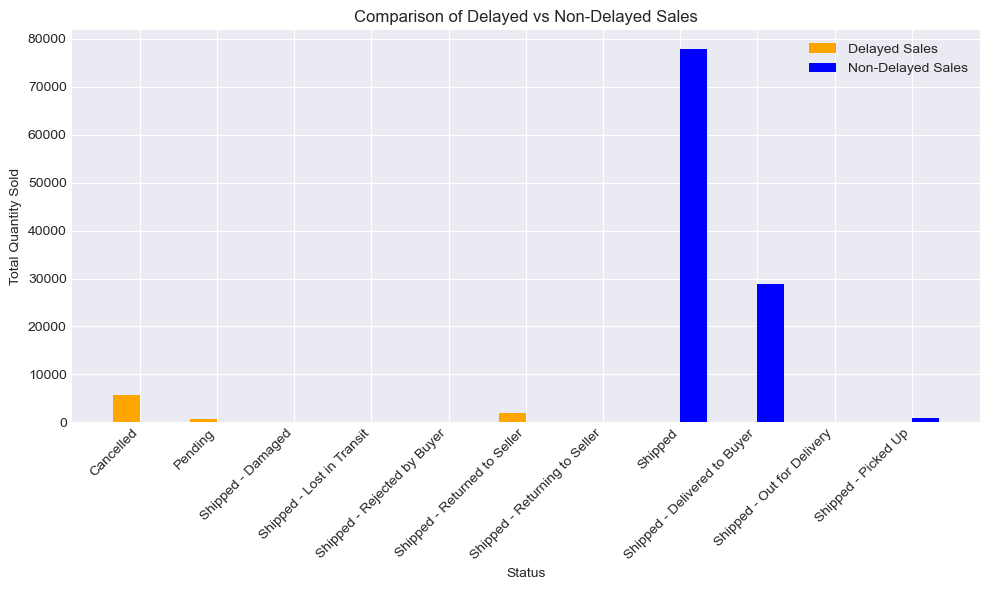

In [55]:
# Merge both DataFrames on 'Status' to ensure alignment
merged_df = pd.merge(Group_of_delay, Group_of_Non_delay, on='Status', how='outer').fillna(0)

# Plotting using the merged DataFrame
bar_width = 0.35
index = np.arange(len(merged_df['Status']))

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for delayed sales
bar1 = ax.bar(index, merged_df['Total_quantity'], bar_width, label='Delayed Sales', color='orange')

# Bars for non-delayed sales
bar2 = ax.bar(index + bar_width, merged_df['Total_Quantity'], bar_width, label='Non-Delayed Sales', color='blue')

ax.set_xlabel('Status')
ax.set_ylabel('Total Quantity Sold')
ax.set_title('Comparison of Delayed vs Non-Delayed Sales')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(merged_df['Status'], rotation=45, ha='right')

# Adding a legend
ax.legend()
plt.tight_layout()
plt.show()


## Sales Quantity and Revenue Analysis:

Mean: 12942.111111111111
Median: 1053.0
Mode: 3


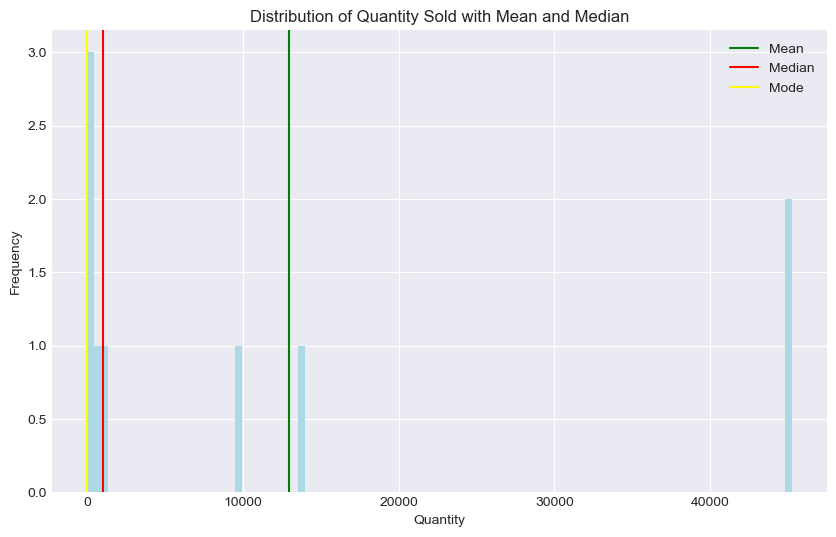

In [51]:
# Distribution of Quantity

across_products = df.groupby('Category')['Qty'].sum().reset_index()
mean = across_products['Qty'].mean()
median = across_products['Qty'].median()
mode = across_products['Qty'].mode()[0]
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")

plt.figure(figsize=(10,6))
plt.hist(across_products['Qty'], bins=100, color='lightblue')
plt.axvline(mean, color='green', label='Mean')
plt.axvline(median, color='red', label='Median')
plt.axvline(mode, color='yellow', label='Mode')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity Sold with Mean and Median')
plt.legend()
plt.show()

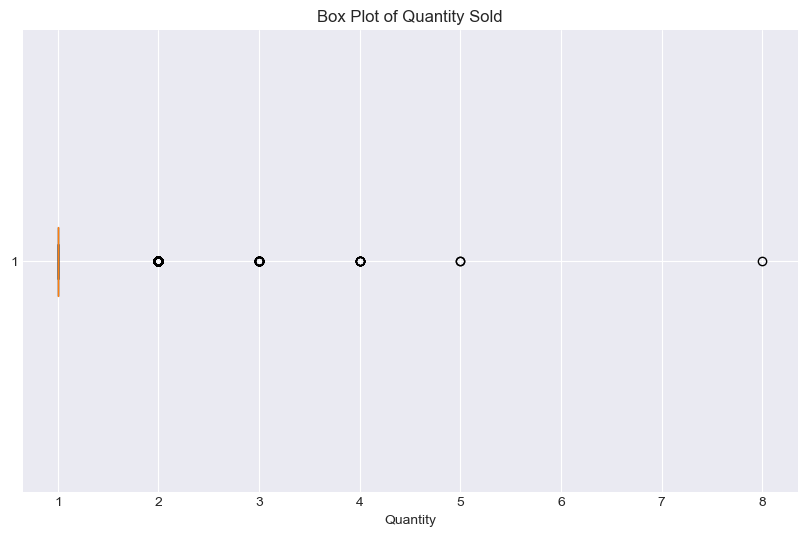

In [52]:
# Boxplot of Product Quantity

plt.figure(figsize=(10, 6))
plt.boxplot(df['Qty'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Adding labels and title
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity Sold')
plt.show()

In [53]:
# Correlation of Quantity, Category, Fulfilment, Amount

from sklearn.preprocessing import OrdinalEncoder

Encoding_data = df[['Category','Fulfilment', 'Status', 'B2B']]
Oee = OrdinalEncoder()
Hot_encoding = Oee.fit_transform(Encoding_data)
df[['Category Status', 'FulFilment Business', 'Status_of', 'Business_to_Business' ]] = Hot_encoding

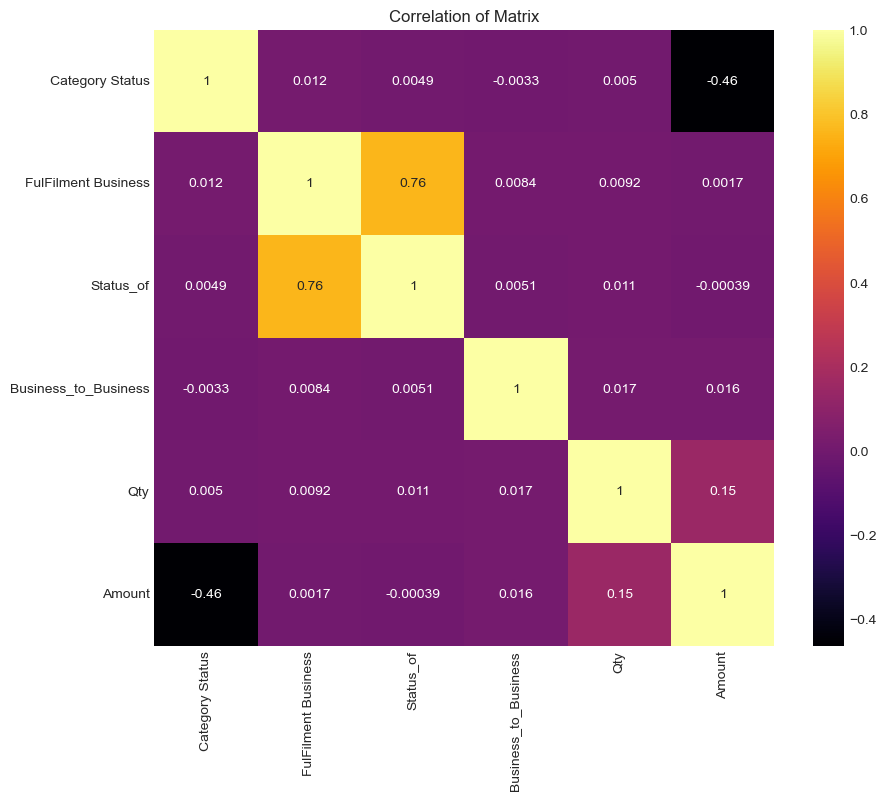

In [54]:
correlation_betw = df[['Category Status', 'FulFilment Business', 'Status_of', 'Business_to_Business', 'Qty', 'Amount' ]]
df_corr = correlation_betw.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='inferno')
plt.title('Correlation of Matrix')
plt.show()

In [56]:
# Drop the columns

df.drop(['Category Status', 'FulFilment Business', 'Status_of', 'Business_to_Business'],axis=1)


,Order ID,Date,Status,Fulfilment,Sales Channel,Style,SKU,Category,Size,Courier Status,Qty,Amount,B2B,week,month,year,Season
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,0.0,Shipped,1,406.0,False,17,4,2022,Spring
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,8.0,Shipped,1,329.0,True,17,4,2022,Spring
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,0.0,Shipped,1,574.0,False,17,4,2022,Spring
5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,SET264,SET264-KR-NP-XL,Set,8.0,Shipped,1,824.0,False,17,4,2022,Spring
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,J0095,J0095-SET-L,Set,5.0,Shipped,1,653.0,False,17,4,2022,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,JNE3697,JNE3697-KR-XL,kurta,8.0,Shipped,1,517.0,False,22,5,2022,Spring
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,SET401,SET401-KR-NP-M,Set,6.0,Shipped,1,999.0,False,22,5,2022,Spring
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,J0157,J0157-DR-XXL,Western Dress,10.0,Shipped,1,690.0,False,22,5,2022,Spring
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,J0012,J0012-SKD-XS,Set,9.0,Shipped,1,1199.0,False,22,5,2022,Spring


### Analyzing Total Sales Amount Distribution and Its Variation Across Product Categories

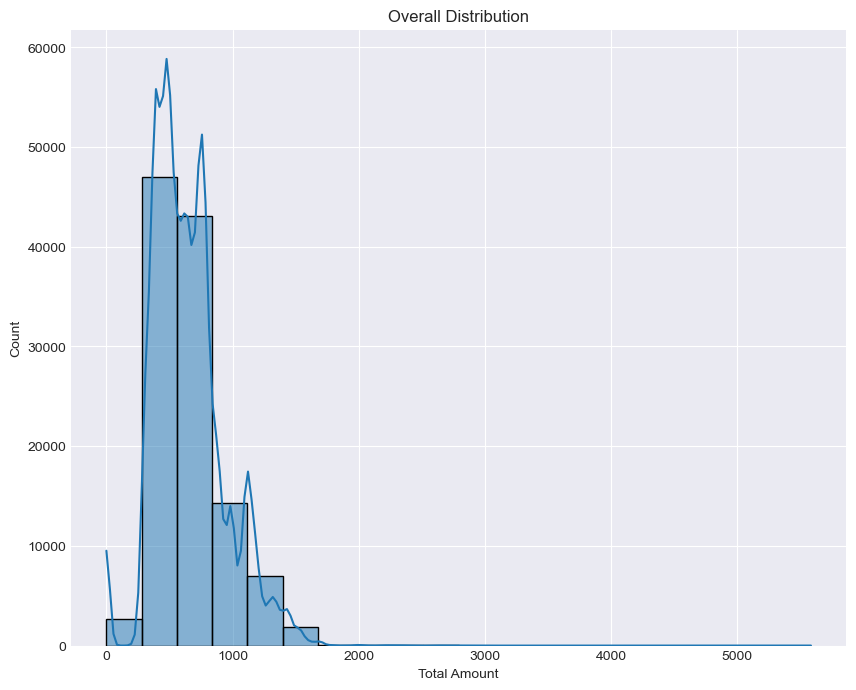

In [57]:
# Total Sales Amount Distribution:

plt.figure(figsize=(10,8))
sns.histplot(data=df['Amount'], bins=20, kde=True)
plt.title('Overall Distribution')
plt.xlabel('Total Amount')
plt.show()

<Axes: >

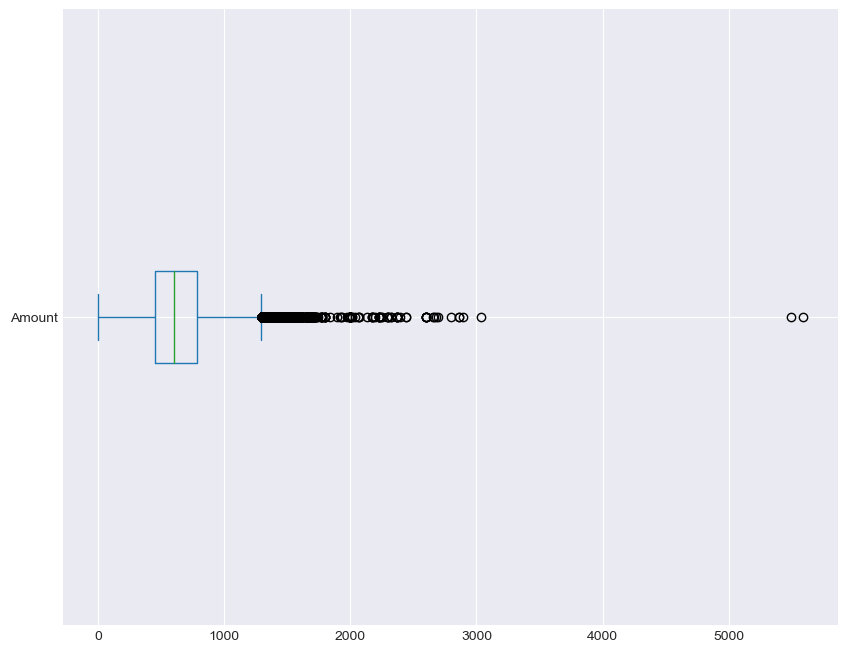

In [58]:
# There has a long tail of Distribution because the skewness is positive as well as right longer tail

df['Amount'].plot(kind='box', figsize=(10,8), vert=0)

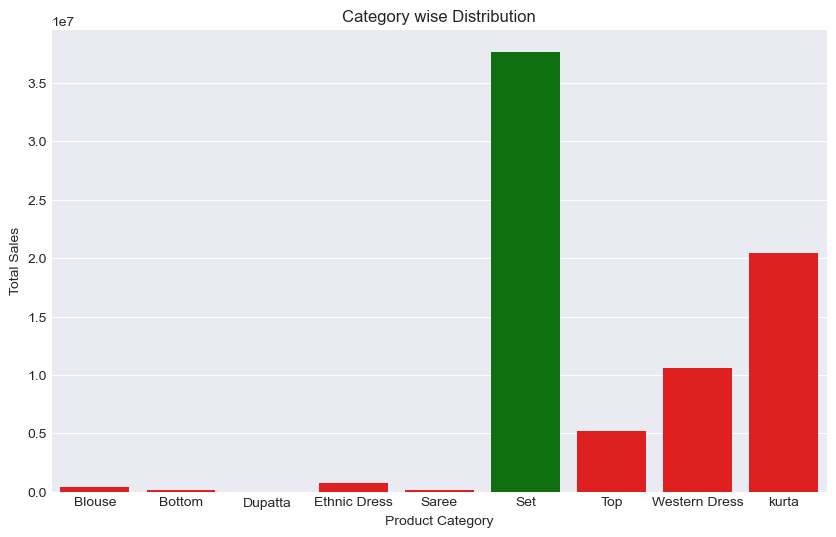

In [73]:
# Category-wise Distribution

Grouping_data = df.groupby('Category')['Amount'].sum().reset_index()
Grouping_data
max_amount = Grouping_data['Amount'].max()
min_amount = Grouping_data['Amount'].min()

# color = ['green' if val == max_amount else 'red' if val == min_amount else 'blue' for val in Grouping_data['Amount']
colors = ['green' if val == max_amount else 'red' if val >= min_amount and val < max_amount else 'yellow'
          if val == min_amount else 'violet' for val in Grouping_data['Amount']]
plt.figure(figsize=(10,6))
sns.barplot(data=Grouping_data, x='Category', y='Amount', palette=colors)
plt.title('Category wise Distribution')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

### Analyzing the Relationship Between Product Size and Total Sales Amount

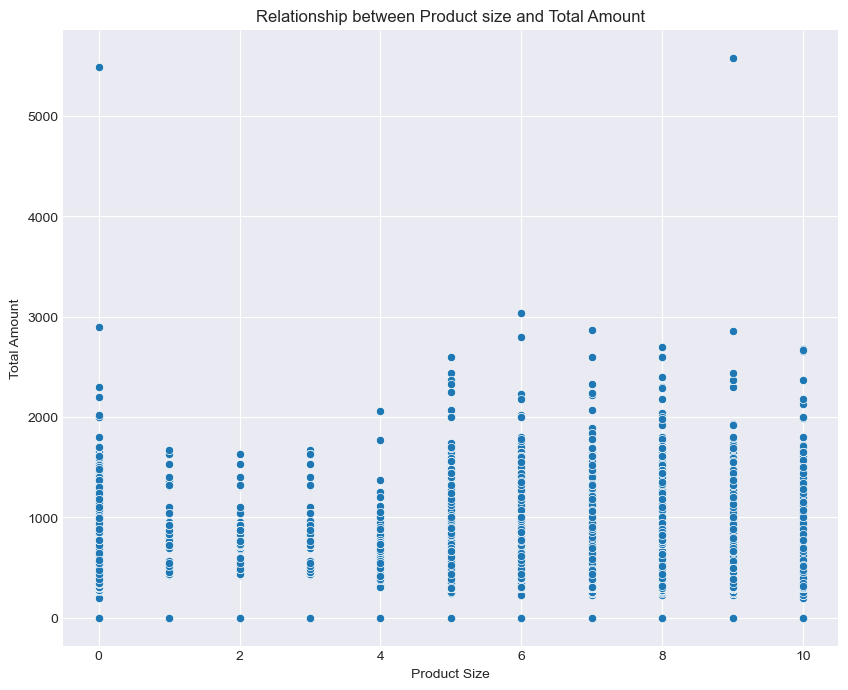

In [75]:
# Check the relationship between Product Size and Total Amount

relations = df[['Size', 'Amount']]

plt.figure(figsize=(10,8))
sns.scatterplot(data=relations, x='Size', y='Amount')
plt.title('Relationship between Product size and Total Amount')
plt.xlabel('Product Size')
plt.ylabel('Total Amount')
plt.show()

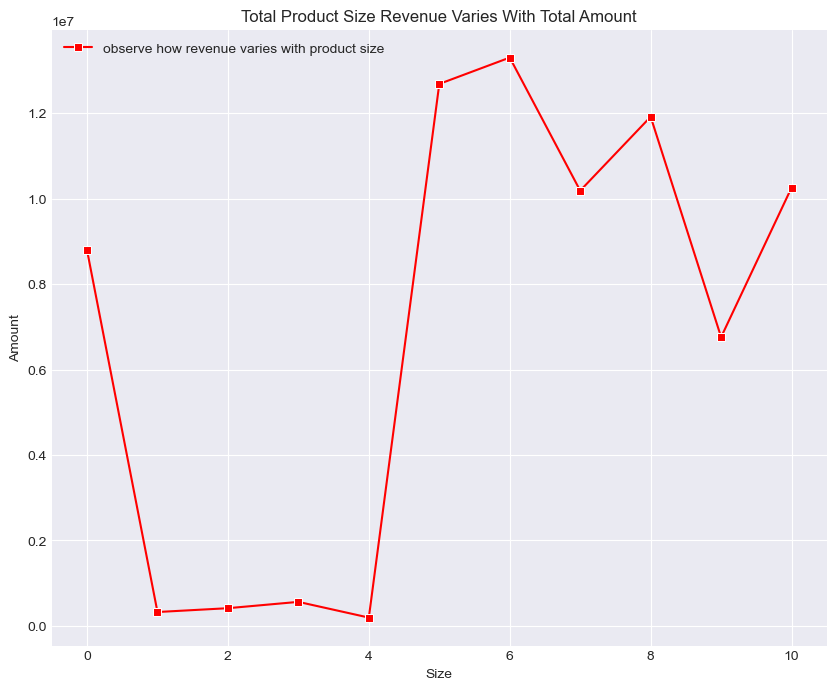

In [81]:
# Data by product size and aggregate the total sales amount for each size. Use a bar or line plot to 
# observe how revenue varies with product size.

Product_groups = df.groupby('Size')['Amount'].sum().reset_index()
Product_groups

plt.figure(figsize=(10,8))
sns.lineplot(x='Size', y='Amount', data=Product_groups, marker='s', 
             label='observe how revenue varies with product size', color='red')
plt.title('Total Product Size Revenue Varies With Total Amount')
plt.show()

In [86]:
Product_groups = df.groupby('Size')['Amount'].sum().reset_index()
Product_groups

,Size,Amount
0,0.0,8794922.0
1,1.0,325318.0
2,2.0,414809.0
3,3.0,562718.0
4,4.0,195068.0
5,5.0,12684744.0
6,6.0,13301382.0
7,7.0,10186895.0
8,8.0,11916874.0
9,9.0,6759023.0


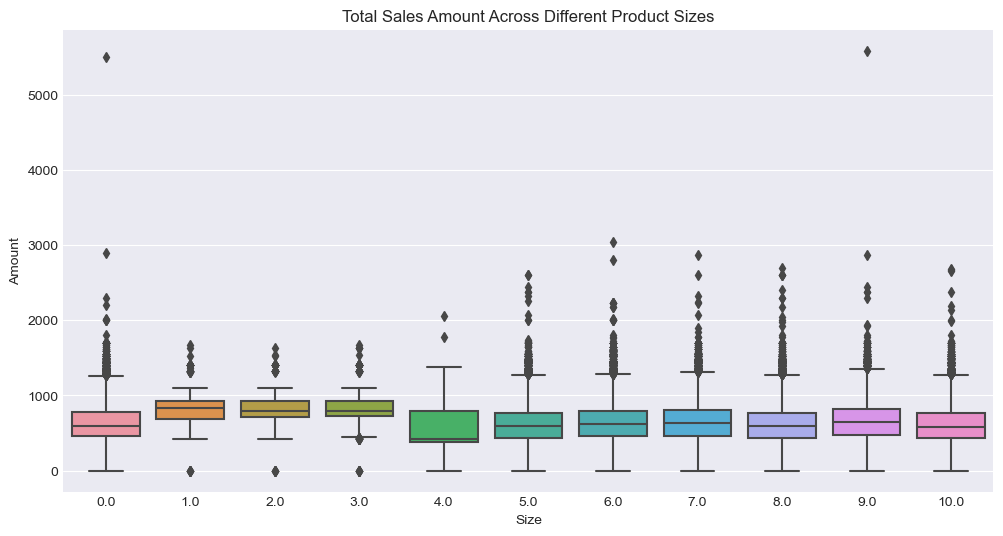

In [84]:
# compare the total sales amount across different product sizes. 
# This will help in identifying if there are significant differences in sales distributions between sizes.

plt.figure(figsize=(12,6))
sns.boxplot(x='Size', y='Amount', data=df)
plt.title('Total Sales Amount Across Different Product Sizes')
plt.xlabel('Size')
plt.ylabel('Amount')
plt.show()